In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")

In [7]:
"""
0, PassengerId
1, Survived：servive(1)、died(0)
2, Pclass：1st = Upper，2nd = Middle， 3rd = Lower
3, Name
4, Sex
5, Age
6, SibSp：sibling count
7, Parch：parents/children count。
8, Ticket：tix number
9, Fare：ticket fare
10, Cabin
11, Embarked：C = Cherbourg, Q = Queenstown, S = Southampton
"""
dataset.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print(dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [12]:
print(dataset.info()) #find out there are null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [13]:
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object


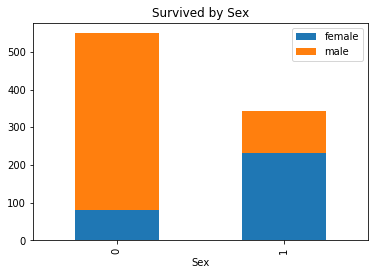

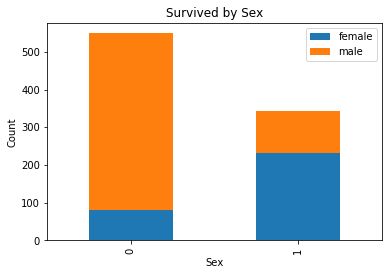

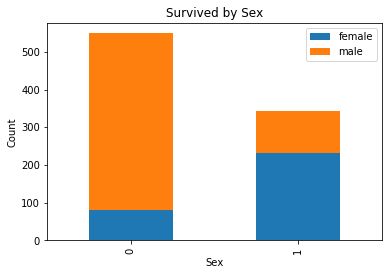

In [17]:
print (dataset['Sex'][0:10])
survived_m = dataset.Survived[dataset.Sex == 'male'].value_counts()
survived_f = dataset.Survived[dataset.Sex == 'female'].value_counts()

df = pd.DataFrame({'male':survived_m, 'female':survived_f})
df.plot(kind = 'bar', stacked = True)
plt.title("Survived by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


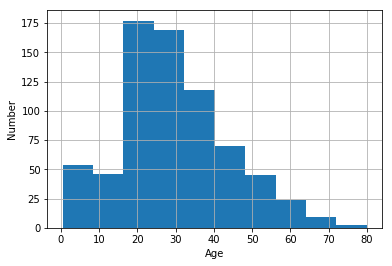

True


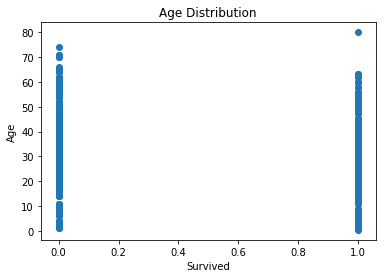

In [20]:
#chack age
print(dataset['Age'][0:10])
dataset['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Number")
plt.show()

print(dataset['Age'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution')
plt.show()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64


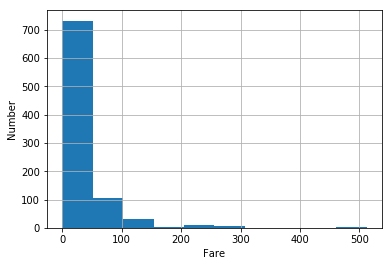

False


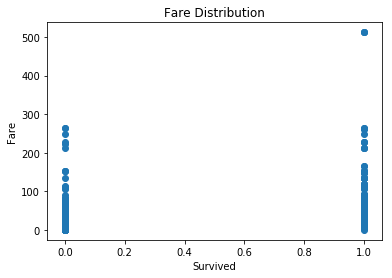

In [24]:
#check fare
print(dataset['Fare'][0:10])
dataset['Fare'].hist()
plt.xlabel("Fare")
plt.ylabel("Number")
plt.show()

print(dataset['Fare'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fare Distribution')
plt.show()

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


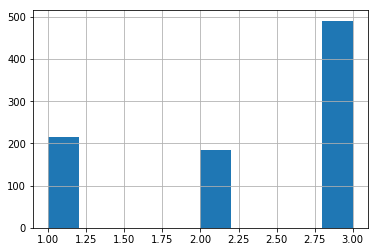

False
    p1  p2   p3
0   80  97  372
1  136  87  119


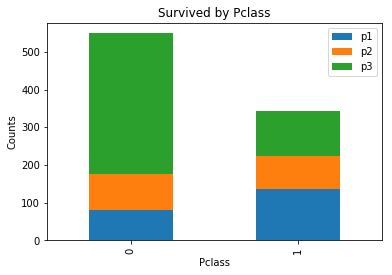

In [35]:
#check class
print(dataset['Pclass'][0:10])
dataset['Pclass'].hist()
plt.show()
print(dataset['Pclass'].isnull().values.any())

survived_p1 = dataset.Survived[dataset.Pclass == 1].value_counts()
survived_p2 = dataset.Survived[dataset.Pclass == 2].value_counts()
survived_p3 = dataset.Survived[dataset.Pclass == 3].value_counts()
# print(survived_p2)
df = pd.DataFrame({'p1':survived_p1, 'p2':survived_p2, 'p3':survived_p3})
print(df)
df.plot(kind = 'bar', stacked = True)
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.title('Survived by Pclass')
plt.show()

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object
    C   Q    S
0  75  47  427
1  93  30  217


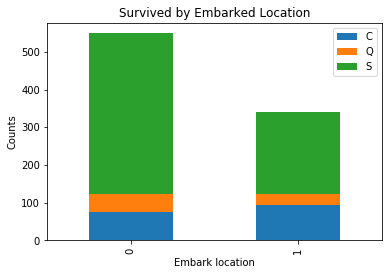

In [36]:
#check embark location
print(dataset['Embarked'][0:10])


survived_S = dataset.Survived[dataset.Embarked == 'S'].value_counts()
survived_C = dataset.Survived[dataset.Embarked == 'C'].value_counts()
survived_Q = dataset.Survived[dataset.Embarked == 'Q'].value_counts()
# print(survived_p2)
df = pd.DataFrame({'S':survived_S, 'C':survived_C, 'Q':survived_Q})
print(df)
df.plot(kind = 'bar', stacked = True)
plt.xlabel('Embark location')
plt.ylabel('Counts')
plt.title('Survived by Embarked Location')
plt.show()

In [41]:
#get useful data and train
label = dataset.loc[:, 'Survived']
data = dataset.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
testdata = testset.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
print (data.shape)
print(data)


(891, 5)
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male   NaN    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male   NaN   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female   NaN    7.2250        C
20        2    male  35.0   26.0000        S
2

In [46]:
#handle null
def fill_NAN(data):
    data_copy = data.copy(deep = True)
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy

data_no_nan = fill_NAN(data)
testdata_no_nan = fill_NAN(testdata)

print(testdata.isnull().values.any())
print(testdata_no_nan.isnull().values.any())
print(data.isnull().values.any())

print(data_no_nan)

True
False
True
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male  28.0    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male  28.0   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female  28.0    7.2250        C
20        2    male  35.0   26.0000    

In [49]:
#handle sex
print(data_no_nan['Sex'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep = True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdata_after_sex = transfer_sex(testdata_no_nan)
print(testdata_after_sex)

False
     Pclass Sex   Age      Fare Embarked
0         3   1  34.5    7.8292        Q
1         3   0  47.0    7.0000        S
2         2   1  62.0    9.6875        Q
3         3   1  27.0    8.6625        S
4         3   0  22.0   12.2875        S
5         3   1  14.0    9.2250        S
6         3   0  30.0    7.6292        Q
7         2   1  26.0   29.0000        S
8         3   0  18.0    7.2292        C
9         3   1  21.0   24.1500        S
10        3   1  27.0    7.8958        S
11        1   1  46.0   26.0000        S
12        1   0  23.0   82.2667        S
13        2   1  63.0   26.0000        S
14        1   0  47.0   61.1750        S
15        2   0  24.0   27.7208        C
16        2   1  35.0   12.3500        Q
17        3   1  21.0    7.2250        C
18        3   0  27.0    7.9250        S
19        3   0  45.0    7.2250        C
20        1   1  55.0   59.4000        C
21        3   1   9.0    3.1708        S
22        1   0  27.0   31.6833        S
23        

In [71]:
#handle embark
def transfer_embark(data):
    data_copy = data.copy(deep = True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_embarked = transfer_embark(data_after_sex)
testdata_after_embarked = transfer_embark(testdata_after_sex)
print(testdata_after_embarked)

     Pclass Sex   Age      Fare Embarked
0         3   1  34.5    7.8292        2
1         3   0  47.0    7.0000        0
2         2   1  62.0    9.6875        2
3         3   1  27.0    8.6625        0
4         3   0  22.0   12.2875        0
5         3   1  14.0    9.2250        0
6         3   0  30.0    7.6292        2
7         2   1  26.0   29.0000        0
8         3   0  18.0    7.2292        1
9         3   1  21.0   24.1500        0
10        3   1  27.0    7.8958        0
11        1   1  46.0   26.0000        0
12        1   0  23.0   82.2667        0
13        2   1  63.0   26.0000        0
14        1   0  47.0   61.1750        0
15        2   0  24.0   27.7208        1
16        2   1  35.0   12.3500        2
17        3   1  21.0    7.2250        1
18        3   0  27.0    7.9250        0
19        3   0  45.0    7.2250        1
20        1   1  55.0   59.4000        1
21        3   1   9.0    3.1708        0
22        1   0  27.0   31.6833        0
23        1   1 

In [73]:
#train data
data_now = data_after_embarked
testdata_now = testdata_after_embarked
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data_now,
                                                                    label,
                                                                    random_state = 0,
                                                                    train_size = 0.8)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape )

(712, 5) (179, 5) (712,) (179,)


In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(data_now, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [56]:
predictions = clf.predict(test_data)

In [60]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(accuracy_score(test_labels, predictions))
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions))

0.832402234637
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       110
          1       0.82      0.72      0.77        69

avg / total       0.83      0.83      0.83       179

[[99 11]
 [19 50]]


In [62]:
#find the best K
from sklearn.model_selection import cross_val_score

k_range = range(1, 50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, data_now, label, cv = 5, scoring = 'accuracy')
    print("K = " + str(k) + ", score = " + str(scores) + ", mean = " + str(scores.mean()))
    k_scores.append(scores.mean()
                   )

K = 1, score = [ 0.62011173  0.67597765  0.70224719  0.69662921  0.70621469], mean = 0.680236095847
K = 2, score = [ 0.61452514  0.7150838   0.70786517  0.69662921  0.66101695], mean = 0.679024053945
K = 3, score = [ 0.66480447  0.68156425  0.71910112  0.74157303  0.70621469], mean = 0.702651512331
K = 4, score = [ 0.63128492  0.69273743  0.69101124  0.68539326  0.70621469], mean = 0.681328306003
K = 5, score = [ 0.63687151  0.66480447  0.69662921  0.70224719  0.71186441], mean = 0.682483357786
K = 6, score = [ 0.60335196  0.70391061  0.69101124  0.6741573   0.74576271], mean = 0.683638764205
K = 7, score = [ 0.62569832  0.72067039  0.70786517  0.70224719  0.75706215], mean = 0.702708644305
K = 8, score = [ 0.61452514  0.68715084  0.70786517  0.70786517  0.71751412], mean = 0.686984087805
K = 9, score = [ 0.61452514  0.68715084  0.71348315  0.73595506  0.73446328], mean = 0.697115491347
K = 10, score = [ 0.61452514  0.70391061  0.71348315  0.71348315  0.75706215], mean = 0.700492838643

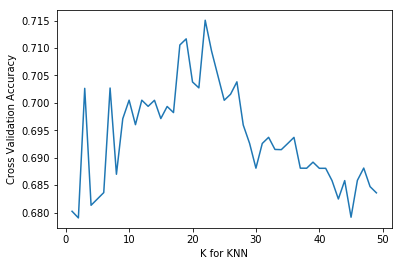

In [63]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.show()


In [74]:
#confirm the best accuracy k = 20
clf = KNeighborsClassifier(n_neighbors = 20)
clf.fit(data_now, label)
result = clf.predict(testdata_now)
print(result)

[0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


In [77]:
#file output
df = pd.DataFrame({"PassengerId" : testset['PassengerId'], "Survived": result})
df.to_csv('survived_submission.csv', header = True)